# Document information

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Basic graphics for a single-column data file</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2018-06-26</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-06-22</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">basic_graphics_single_column.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">basic_statistics_single_column_data.csv</td>
    </tr>
</table>

# Introduction

The purpose of this Jupyter notebook is to illustrate a basic notebook structure. The script reads a single-column file and calculates basic graphics. It progresses from quick-and-dirty code to pretty.

# Import librairies and basic setup

In [1]:
# Import the Python pandas library. Give it a shortcut name of "pd".
# Import the Python numpy library. Give it a shortcut name of "np".
# Import the stem_graphic portion of the stemgraphic library.
#    Give it a shortcut name of "stg".
# Import the formula.api portion of the statsmodels library.
#    Give it a shorcut name of "smf".
# These libraries contain the methods required for the analyses.
import pandas as pd
import numpy as np
from stemgraphic import stem_graphic as stg
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# Add the "magic function" to render figures in a Jupyter notebook.
%matplotlib inline

# Read the data file

The data file has one column labelled "y". It is saved as a CSV format with UTF-8 encoding.

In [3]:
# Read the data file and save it to a dataframe called "df".
df = pd.read_csv('basic_graphics_single_column_data.csv')

In [4]:
# View the first five rows of data.
df.head(5)

,y
0,61.285093
1,71.414479
2,75.356495
3,54.584659
4,65.031903


In [5]:
# View the last five rows of data.
df.tail(5)

,y
45,74.690169
46,91.034409
47,79.701784
48,48.918434
49,71.215380


# Perform the analysis

## Box plot

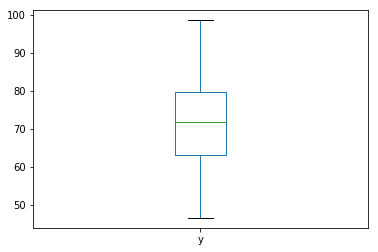

In [6]:
# Create a box plot.
df['y'].plot.box()

In [7]:
# The horizontal lines, from top to bottom, are:
# - Maximum
# - Third quartile
# - Median
# - First quartile
# - Minimum

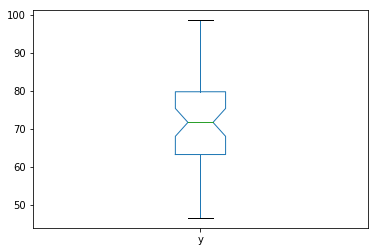

In [8]:
# Add the 95 % confidence interval of the median.
df['y'].plot.box(notch=True)

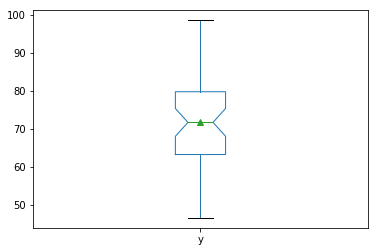

In [9]:
# Add the average.
df['y'].plot.box(notch=True, showmeans=True)

In [10]:
# Print the statistics of the box plot.
print('Maximum',
      df['y'].max(),
      sep=" = ")
print('Third quartile',
      df['y'].quantile(.75),
      sep=" = ")
print('Median',
      df['y'].median(),
      sep=" = ")
print('Average',
      df['y'].mean(),
      sep=" = ")
print('First quartile',
      df['y'].quantile(.25),
      sep=" = ")
print('Minimum',
      df['y'].min(),sep=" = ")
print('Upper confidence value',
      df['y'].median() + 1.57 * (df['y'].quantile(.75) - df['y'].quantile(.25))\
          /np.sqrt(df['y'].count()),
      sep=" = ")
print('Lower confidence value',
      df['y'].median() - 1.57 * (df['y'].quantile(.75) - df['y'].quantile(.25))\
          /np.sqrt(df['y'].count()),
      sep=" = ")

Maximum = 98.6429381944306
Third quartile = 79.8066775532682
Median = 71.73965689088165
Average = 71.73696435881797
First quartile = 63.270517599822384
Minimum = 46.5747905722245
Upper confidence value = 75.41120577397187
Lower confidence value = 68.06810800779142


In [11]:
df['y'].max()

98.6429381944306

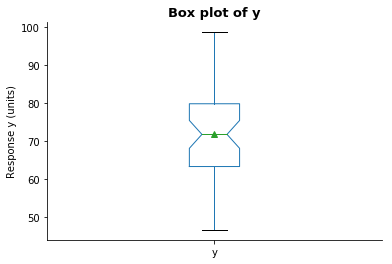

In [12]:
# Make a pretty graph.
ax = df['y'].plot.box(notch=True, showmeans=True)
ax.set_title('Box plot of y', fontweight='bold', fontsize=13)
ax.set_ylabel('Response y (units)')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

## Histogram

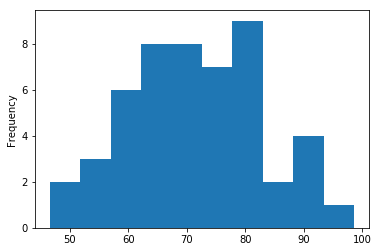

In [13]:
# Create a histogram.
df['y'].plot.hist()

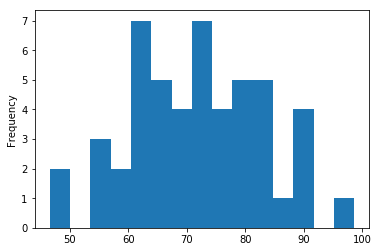

In [14]:
# Change the number of bins.
df['y'].plot.hist(bins=15)

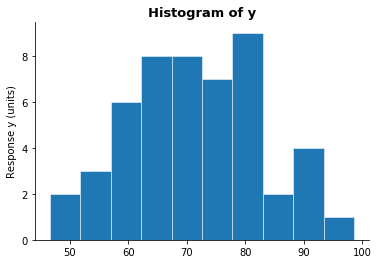

In [15]:
# Make a pretty graph.
ax = df['y'].plot.hist(edgecolor='white', linewidth=.5)
ax.set_title('Histogram of y', fontweight='bold', fontsize=13)
ax.set_ylabel('Response y (units)')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# Scatter plot

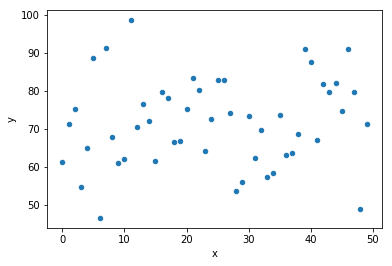

In [16]:
# Create a scatter plot, assuming data are in time order.
df['x'] = df.index
df.plot.scatter(x='x', y='y')

In [17]:
# Perform a linear regression.
lm = smf.ols(formula='y ~ x', data=df).fit()
lm.params

Intercept    69.727087
x             0.082036
dtype: float64

In [18]:
# Create a dataframe with the minimum and maximum values of 'x'.
x_min_max = pd.DataFrame({'x': [df['x'].min(), df['x'].max()]})
x_min_max

,x
0,0
1,49


In [19]:
# Estimate 'y' for these 'x' values and store them in 'estimates'.
y_estimates = lm.predict(x_min_max)
y_estimates

0    69.727087
1    73.746841
dtype: float64

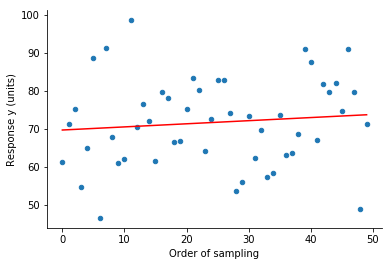

In [20]:
# Plot the linear regression line. Clean it up.
ax = plt.subplot(111)
df.plot.scatter(x='x', y='y', ax=ax)
plt.plot(x_min_max, y_estimates, color='red')
ax.set_ylabel('Response y (units)')
ax.set_xlabel('Order of sampling')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# Stem-and-leaf plot

/usr/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<Figure size 540x1008 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f02875aea20>)

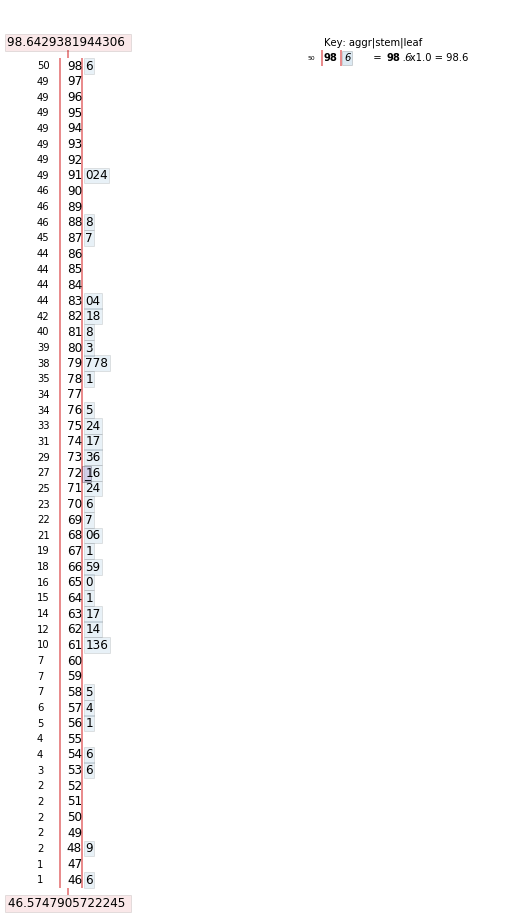

In [21]:
stg(df['y'])

# Run chart

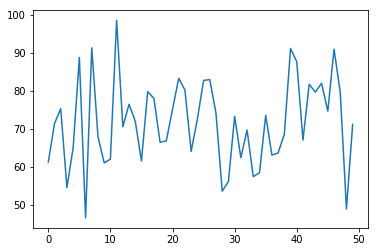

In [22]:
# Plot a run chart, using the index for x.
df['y'].plot()

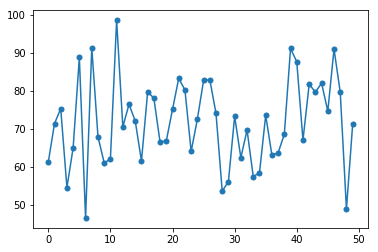

In [23]:
# Add markers that are circles and of a certain size.
df['y'].plot(marker='o', markersize=5)

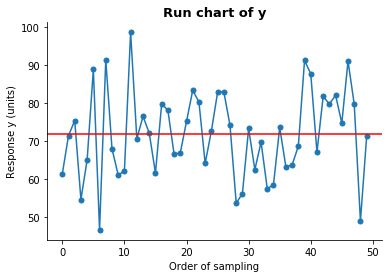

In [24]:
# Clean it up. Add a red line for the average.
ax = df['y'].plot(marker='o', markersize=5, legend=False)
ax.axhline(y=df['y'].mean(), color='red')
ax.set_ylabel('Response y (units)')
ax.set_xlabel('Order of sampling')
ax.set_title('Run chart of y', fontweight='bold', fontsize=13)
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# References

- [matplotlib](https://matplotlib.org/api/pyplot_api.html)
- [numpy](https://docs.scipy.org/doc/numpy/reference/)
- [pandas API](https://pandas.pydata.org/pandas-docs/stable/api.html)
- [statsmodels](http://www.statsmodels.org/dev/example_formulas.html)
- [stemgraphic](http://stemgraphic.org/doc/index.html)